### Analysis of Tesla's & NIKE vs. S&P 500

Sandra Nachfoerg 

In [103]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from scipy import stats
import seaborn as sns

In [104]:
#Import TSLA from yahoo finance from 2011-2020

tesla= pdr.get_data_yahoo("TSLA",
                            start = "2011-01-01",
                            end = "2020-11-01")
nike= pdr.get_data_yahoo("NKE", 
                        start = "2011-01-01",
                        end= "2020-11-01")

In [105]:
#Import TSLA from yahoo finance from 2011-2020
SP500= pdr.get_data_yahoo("SPY",
                          start = "2011-01-01",
                          end= "2020-11-01")

In [106]:
#Making sure that the dataset looks okay
nike.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,21.645000,21.315001,21.457500,21.522499,8566400.0,16.666460
2011-01-04,21.437500,20.937500,21.400000,20.992500,13797600.0,16.256046
2011-01-05,21.207500,20.877501,20.912500,21.129999,11598800.0,16.362526
2011-01-06,21.125000,20.889999,21.112499,20.940001,8057200.0,16.215391
2011-01-07,20.987499,20.817499,20.924999,20.882500,8174400.0,16.170864


In [107]:
SP500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,127.599998,125.699997,126.709999,127.050003,138725200.0,104.119293
2011-01-04,127.370003,126.190002,127.330002,126.980003,137409700.0,104.061905
2011-01-05,127.720001,126.459999,126.580002,127.639999,133975300.0,104.602806
2011-01-06,127.830002,127.010002,127.690002,127.389999,122519000.0,104.397934
2011-01-07,127.769997,126.150002,127.559998,127.139999,156034600.0,104.193031


## 2. Graph the Adjusted Close over the years for Tesla

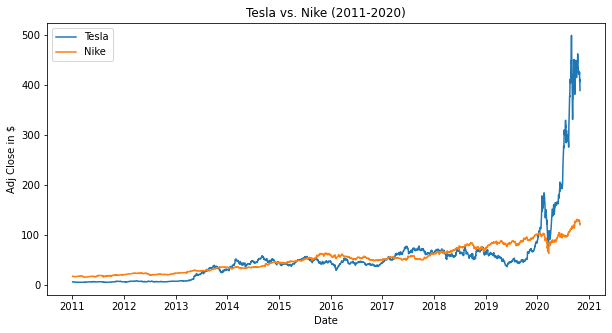

In [108]:
#Define the x and y labels for the graph

plt.figure(figsize= (10,5))

x = tesla.index         #Date
y= tesla['Adj Close']   #Price

x1 = nike.index
y1= nike["Adj Close"]

plt.xlabel("Date")
plt.ylabel("Adj Close in $")

plt.plot(x,y)
plt.plot(x1,y1)
plt.title("Tesla vs. Nike (2011-2020)")
plt.legend(["Tesla", "Nike"])

## 3. Calculate the monthly percentage change

In [109]:
#Calculate the percentage change of the adjusted close, including all rows 
#but the first one (daily& monthly)
tesla_daily_returns = tesla['Adj Close'].pct_change()[1:]
tesla_monthly_returns= tesla["Adj Close"].resample("M").ffill().pct_change()

nike_daily_returns = nike["Adj Close"].pct_change()[1:]
nike_monthly_returns = nike["Adj Close"].resample("M").ffill().pct_change()

In [110]:
#Do the same for SP500
SP500_daily_returns = SP500["Adj Close"].pct_change()[1:]
SP500_monthly_returns= SP500["Adj Close"].resample("M").ffill().pct_change()

In [111]:
nike_daily_returns.head()

Date
2011-01-04   -0.024625
2011-01-05    0.006550
2011-01-06   -0.008992
2011-01-07   -0.002746
2011-01-10    0.007662
Name: Adj Close, dtype: float64

## 4. Plot the monthly returns of Tesla and SP500

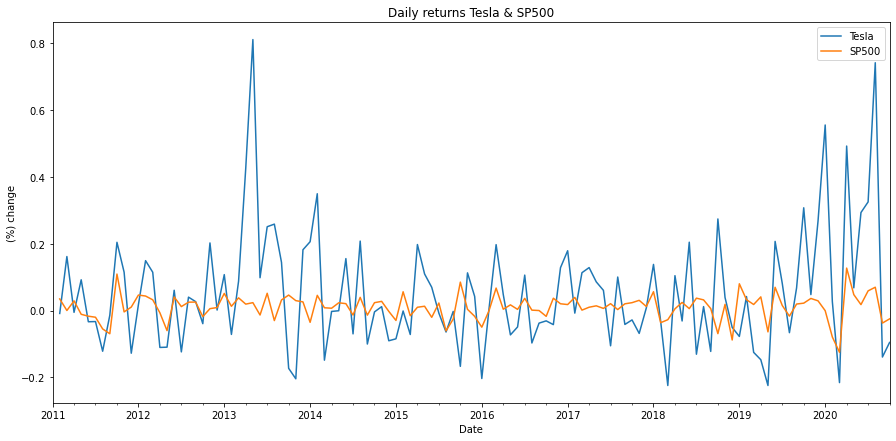

In [112]:
plt.figure(figsize= (15,7)) 
tesla_monthly_returns.plot()
SP500_monthly_returns.plot()

plt.xlabel("Date")
plt.ylabel("(%) change")
plt.title("Daily returns Tesla & SP500")
plt.legend(["Tesla", "SP500"])
plt.show()

Based on the graph, Tesla looks like an aggressive stock (Beta>1) but we still have to calculate it.
Nike seems less aggressive and a little more defensive.

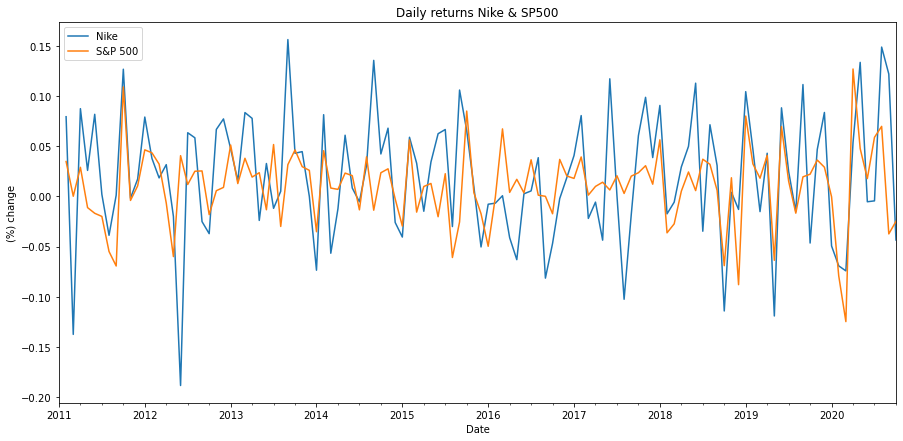

In [113]:
plt.figure(figsize= (15,7)) 
nike_monthly_returns.plot()
SP500_monthly_returns.plot()

plt.xlabel("Date")
plt.ylabel("(%) change")
plt.title("Daily returns Nike & SP500")
plt.legend(["Nike", "S&P 500"])
plt.show()

 Nike seems quite similar to the market and less aggressive.


### 5. Graph the monthly returns of Tesla vs. SP500 returns

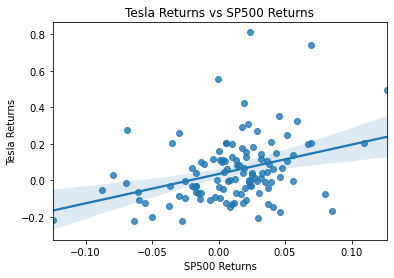

In [114]:
fig, ax = plt.subplots()


sns.regplot(SP500_monthly_returns.values,
tesla_monthly_returns.values)
plt.xlabel("SP500 Returns")
plt.ylabel("Tesla Returns")
plt.title("Tesla Returns vs SP500 Returns")
plt.show()

Interpretation: This graph illustrates the relationship between the returns of Tesla and the returns of S&P 500. The slope of the line is pretty flat and means that the beta is not that high. The scatter around the line explains the firm's specific risk. Tesla has less firm-specific risk than Nike --> see below!

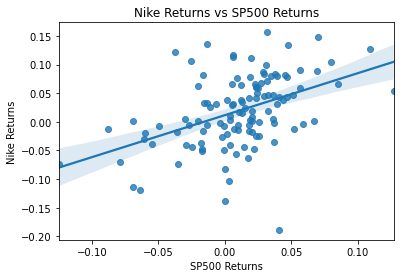

In [115]:
sns.regplot(SP500_monthly_returns.values,
nike_monthly_returns.values)
plt.xlabel("SP500 Returns")
plt.ylabel("Nike Returns")
plt.title("Nike Returns vs SP500 Returns")
plt.show()

Interpretation: The slope is pretty flat and shows that Nike's beta is low. Nike has a wider scatter showing that the firm had more firm-specific risks.

## 6. Calculate the Beta and Alpha Value of Tesla against SP500

In [116]:
(beta, alpha) = stats.linregress(SP500_daily_returns.values,
                tesla_daily_returns.values)[0:2]

In [117]:
print ("Tesla is considered an aggressive stock, because its beta \nis", str(beta),
      "and its alpha is ", alpha)

Tesla is considered an aggressive stock, because its beta 
is 1.3108530183065377 and its alpha is  0.0016543311240569615


In [118]:
(beta1, alpha1) = stats.linregress(SP500_daily_returns.values,
                nike_daily_returns.values)[0:2]

In [119]:
print ("Nike is considered a defensive stock, because its beta \nis", str(beta1),
      "and its alpha is ", alpha1)

Nike is considered a defensive stock, because its beta 
is 0.9604703247998598 and its alpha is  0.00043455240556991527


## 8. Find the Standard deviation on monthly returns

In [120]:
print("Standard Deviation Tesla:", tesla_monthly_returns.std())
print("Standard Deviation Nike: ", nike_monthly_returns.std())

Standard Deviation Tesla: 0.17663128492548535
Standard Deviation Nike:  0.062399998307264636


The Standard Deviation shows us that a Tesla's stock is more volatile than Nike.